[*********************100%***********************]  1 of 1 completed


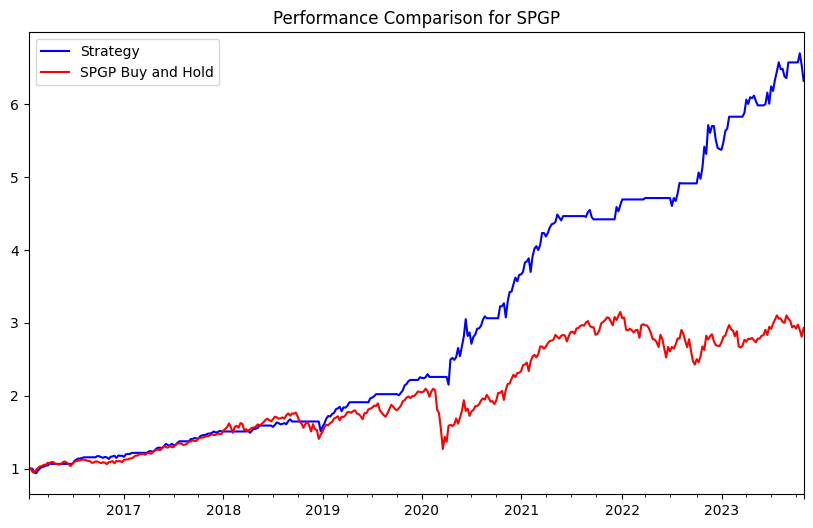

For SPGP:
Strategy: CAGR: 26.72%, Max Drawdown: -11.08%, Sharpe Ratio: 1.78
SPGP Buy and Hold: CAGR: 14.79%, Max Drawdown: -39.46%, Sharpe Ratio: 0.76
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


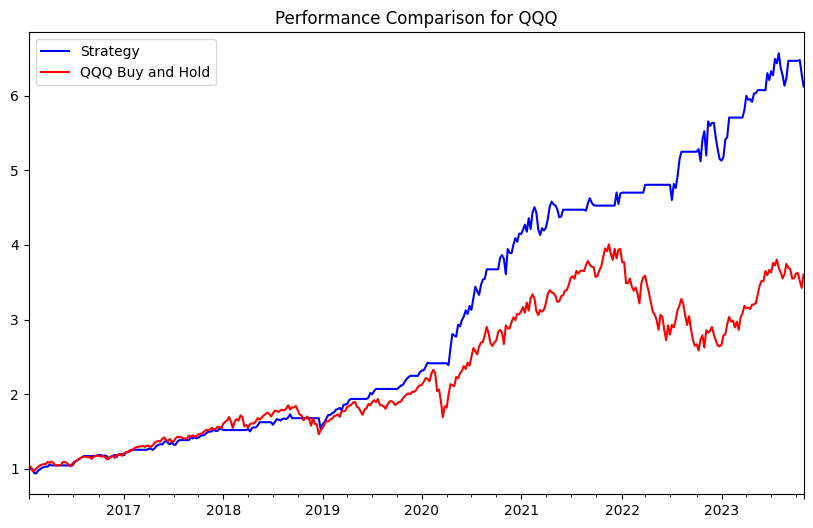

For QQQ:
Strategy: CAGR: 26.20%, Max Drawdown: -11.11%, Sharpe Ratio: 1.77
QQQ Buy and Hold: CAGR: 17.90%, Max Drawdown: -35.46%, Sharpe Ratio: 0.91
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


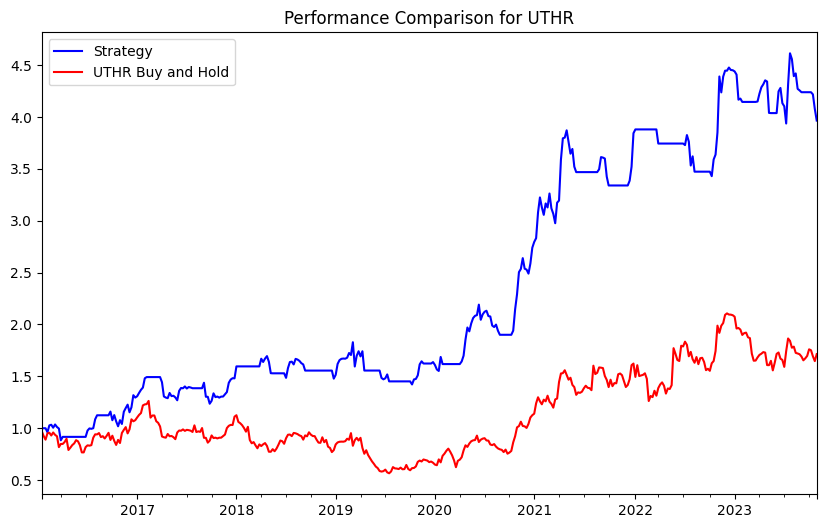

For UTHR:
Strategy: CAGR: 19.35%, Max Drawdown: -22.25%, Sharpe Ratio: 0.88
UTHR Buy and Hold: CAGR: 7.17%, Max Drawdown: -55.21%, Sharpe Ratio: 0.37
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


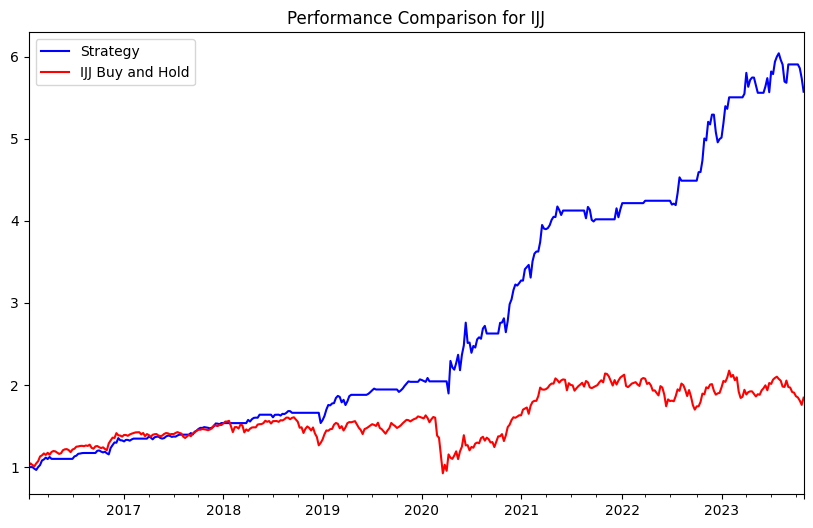

For IJJ:
Strategy: CAGR: 24.69%, Max Drawdown: -13.30%, Sharpe Ratio: 1.45
IJJ Buy and Hold: CAGR: 8.19%, Max Drawdown: -43.28%, Sharpe Ratio: 0.46
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


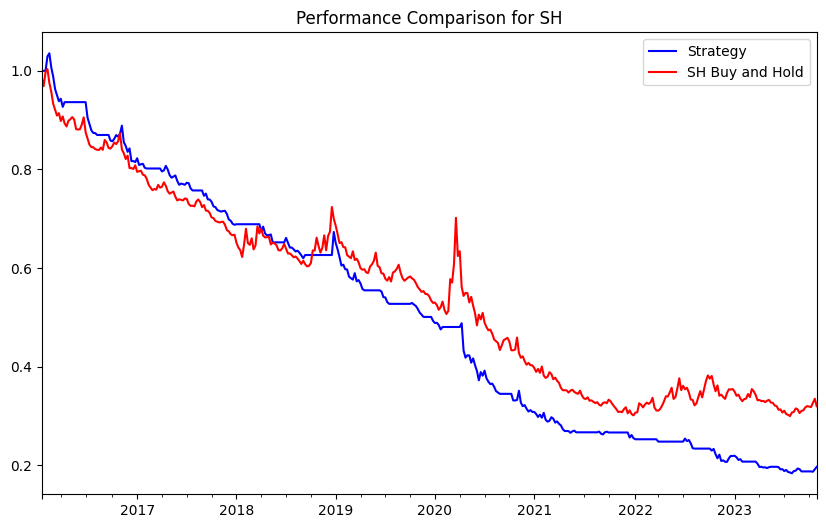

For SH:
Strategy: CAGR: -18.84%, Max Drawdown: -82.24%, Sharpe Ratio: -1.86
SH Buy and Hold: CAGR: -13.62%, Max Drawdown: -70.13%, Sharpe Ratio: -0.75
--------------------------------------------------


In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Read the NFCI data
nfci_data = pd.read_csv('nfci.csv')
nfci_data['date'] = pd.to_datetime(nfci_data['DATE'])
nfci_data.set_index('date', inplace=True)
nfci_data['nfci_sma_14'] = nfci_data['NFCI'].rolling(window=2).mean()  # Corrected window size

tickers = ['SPGP','QQQ','UTHR','IJJ', 'SH']  # Added BTC-USD for Bitcoin

for ticker in tickers:
    # Download data for the ticker
    stock_data = yf.download(ticker, start='2016-01-01', end=nfci_data.index.max())
    stock_data = stock_data[['Close']].resample("W-FRI").last()

    # Merge the two dataframes
    data = stock_data.join(nfci_data, how='inner')

    # Create a signal
    data['signal'] = np.where(data['NFCI'] < data['nfci_sma_14'], 1, 0)

    # Calculate strategy returns
    data['strategy_returns'] = data['Close'].shift(1).pct_change() * data['signal']
    data['stock_returns'] = data['Close'].pct_change()

    # Drop missing values
    data.dropna(inplace=True)

    # Plot the strategy and stock performance
    plt.figure(figsize=(10, 6))
    (data['strategy_returns'] + 1).cumprod().plot(label='Strategy', color='b')
    (data['stock_returns'] + 1).cumprod().plot(label=f'{ticker} Buy and Hold', color='r')
    plt.title(f'Performance Comparison for {ticker}')
    plt.legend()
    plt.show()

    # Annualizing factor assuming trading days
    annualizing_factor = 52

    # CAGR
    years = (data.index[-1] - data.index[0]).days / 365.0
    cagr_strategy = (1 + data['strategy_returns']).cumprod().iloc[-1] ** (1 / years) - 1
    cagr_stock = (1 + data['stock_returns']).cumprod().iloc[-1] ** (1 / years) - 1

    # Max Drawdown
    cumulative_returns_strategy = (1 + data['strategy_returns']).cumprod()
    rolling_max_strategy = cumulative_returns_strategy.expanding().max()
    daily_drawdown_strategy = cumulative_returns_strategy / rolling_max_strategy - 1
    max_drawdown_strategy = daily_drawdown_strategy.min()

    cumulative_returns_stock = (1 + data['stock_returns']).cumprod()
    rolling_max_stock = cumulative_returns_stock.expanding().max()
    daily_drawdown_stock = cumulative_returns_stock / rolling_max_stock - 1
    max_drawdown_stock = daily_drawdown_stock.min()

    # Sharpe Ratio (assuming risk-free rate to be 0)
    sharpe_ratio_strategy = np.mean(data['strategy_returns']) / np.std(data['strategy_returns']) * np.sqrt(annualizing_factor)
    sharpe_ratio_stock = np.mean(data['stock_returns']) / np.std(data['stock_returns']) * np.sqrt(annualizing_factor)

    # Printing the results
    print(f"For {ticker}:")
    print(f"Strategy: CAGR: {cagr_strategy:.2%}, Max Drawdown: {max_drawdown_strategy:.2%}, Sharpe Ratio: {sharpe_ratio_strategy:.2f}")
    print(f"{ticker} Buy and Hold: CAGR: {cagr_stock:.2%}, Max Drawdown: {max_drawdown_stock:.2%}, Sharpe Ratio: {sharpe_ratio_stock:.2f}")
    print("-" * 50)


[*********************100%***********************]  1 of 1 completed


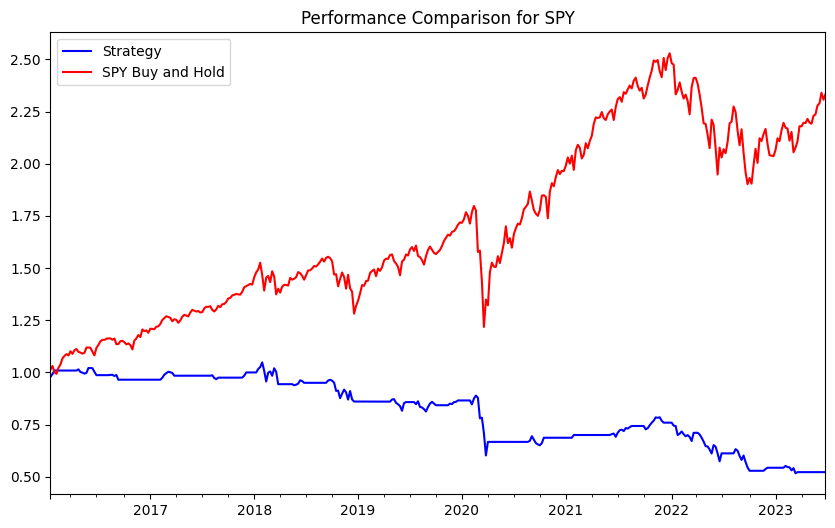

For SPY:
Strategy: CAGR: -8.35%, Max Drawdown: -50.66%, Sharpe Ratio: -0.56
SPY Buy and Hold: CAGR: 12.06%, Max Drawdown: -32.23%, Sharpe Ratio: 0.73
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


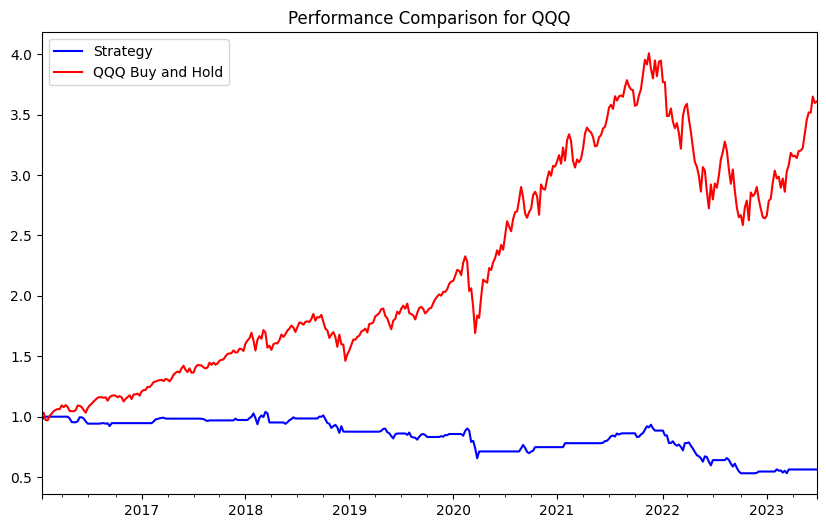

For QQQ:
Strategy: CAGR: -7.40%, Max Drawdown: -48.80%, Sharpe Ratio: -0.43
QQQ Buy and Hold: CAGR: 18.82%, Max Drawdown: -35.46%, Sharpe Ratio: 0.94
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


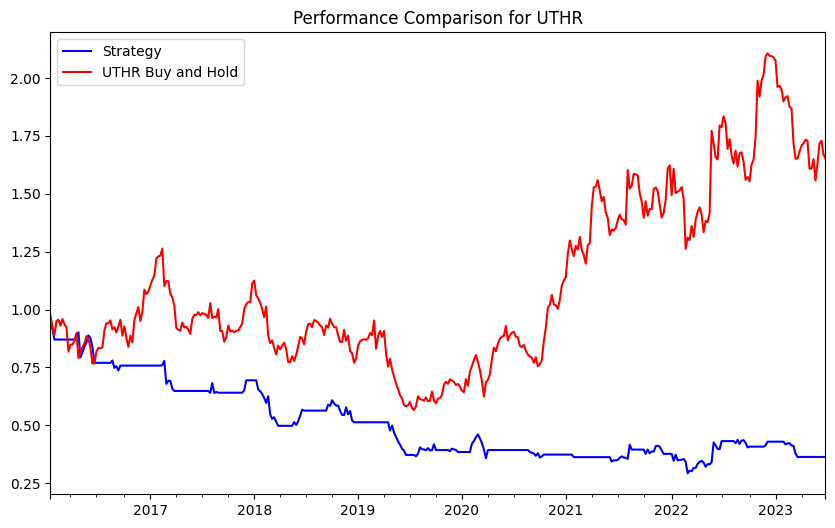

For UTHR:
Strategy: CAGR: -12.72%, Max Drawdown: -68.85%, Sharpe Ratio: -0.47
UTHR Buy and Hold: CAGR: 6.97%, Max Drawdown: -55.21%, Sharpe Ratio: 0.37
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


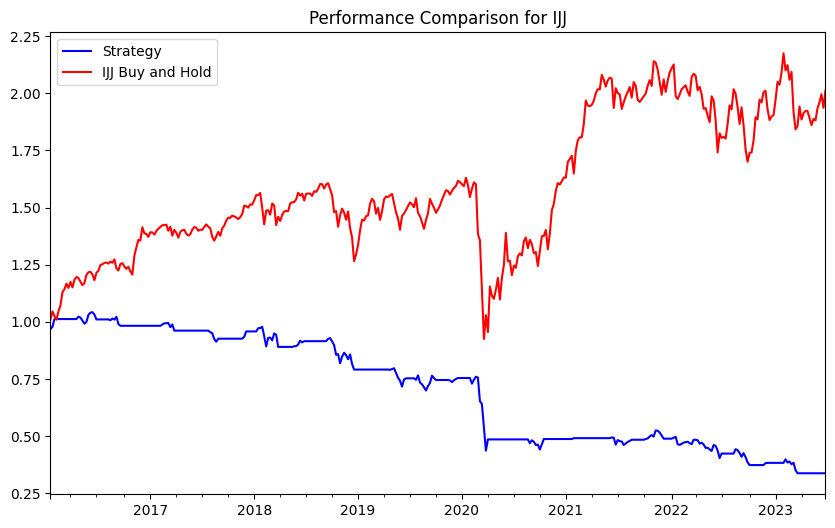

For IJJ:
Strategy: CAGR: -13.59%, Max Drawdown: -67.64%, Sharpe Ratio: -0.79
IJJ Buy and Hold: CAGR: 9.86%, Max Drawdown: -43.28%, Sharpe Ratio: 0.52
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


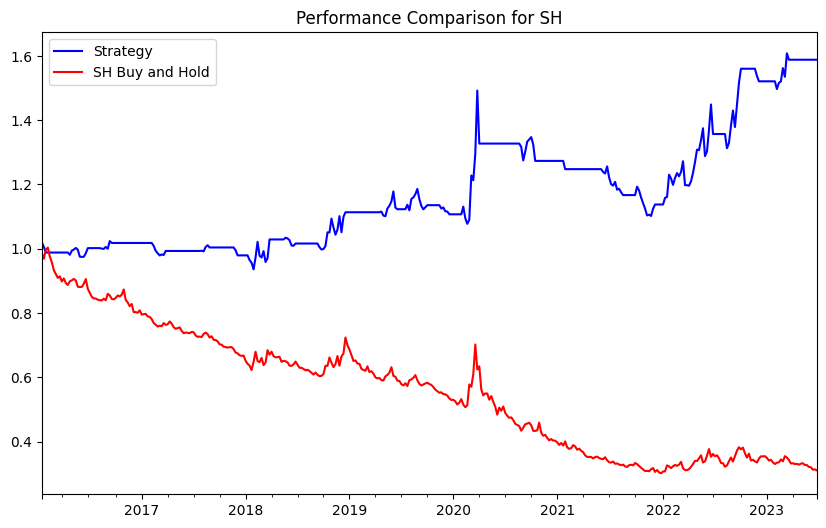

For SH:
Strategy: CAGR: 6.41%, Max Drawdown: -26.16%, Sharpe Ratio: 0.52
SH Buy and Hold: CAGR: -14.55%, Max Drawdown: -69.97%, Sharpe Ratio: -0.80
--------------------------------------------------


In [15]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Read the NFCI data
nfci_data = pd.read_csv('nfci.csv')
nfci_data['date'] = pd.to_datetime(nfci_data['DATE'])
nfci_data.set_index('date', inplace=True)
nfci_data['nfci_sma_14'] = nfci_data['NFCI'].rolling(window=2).mean()  # Corrected window size

tickers = ['SPY','QQQ','UTHR','IJJ', 'SH']  # Added BTC-USD for Bitcoin

for ticker in tickers:
    # Download data for the ticker
    stock_data = yf.download(ticker, start='2016-01-01', end=nfci_data.index.max())
    stock_data = stock_data[['Close']].resample("W-FRI").last()

    # Merge the two dataframes
    data = stock_data.join(nfci_data, how='inner')

    # Create a signal
    data['signal'] = np.where(data['NFCI'] >= data['nfci_sma_14'], 1, 0)

    # Calculate strategy returns
    data['strategy_returns'] = data['Close'].shift(1).pct_change() * data['signal']
    data['stock_returns'] = data['Close'].pct_change()

    # Drop missing values
    data.dropna(inplace=True)

    # Plot the strategy and stock performance
    plt.figure(figsize=(10, 6))
    (data['strategy_returns'] + 1).cumprod().plot(label='Strategy', color='b')
    (data['stock_returns'] + 1).cumprod().plot(label=f'{ticker} Buy and Hold', color='r')
    plt.title(f'Performance Comparison for {ticker}')
    plt.legend()
    plt.show()

    # Annualizing factor assuming trading days
    annualizing_factor = 52

    # CAGR
    years = (data.index[-1] - data.index[0]).days / 365.0
    cagr_strategy = (1 + data['strategy_returns']).cumprod().iloc[-1] ** (1 / years) - 1
    cagr_stock = (1 + data['stock_returns']).cumprod().iloc[-1] ** (1 / years) - 1

    # Max Drawdown
    cumulative_returns_strategy = (1 + data['strategy_returns']).cumprod()
    rolling_max_strategy = cumulative_returns_strategy.expanding().max()
    daily_drawdown_strategy = cumulative_returns_strategy / rolling_max_strategy - 1
    max_drawdown_strategy = daily_drawdown_strategy.min()

    cumulative_returns_stock = (1 + data['stock_returns']).cumprod()
    rolling_max_stock = cumulative_returns_stock.expanding().max()
    daily_drawdown_stock = cumulative_returns_stock / rolling_max_stock - 1
    max_drawdown_stock = daily_drawdown_stock.min()

    # Sharpe Ratio (assuming risk-free rate to be 0)
    sharpe_ratio_strategy = np.mean(data['strategy_returns']) / np.std(data['strategy_returns']) * np.sqrt(annualizing_factor)
    sharpe_ratio_stock = np.mean(data['stock_returns']) / np.std(data['stock_returns']) * np.sqrt(annualizing_factor)

    # Printing the results
    print(f"For {ticker}:")
    print(f"Strategy: CAGR: {cagr_strategy:.2%}, Max Drawdown: {max_drawdown_strategy:.2%}, Sharpe Ratio: {sharpe_ratio_strategy:.2f}")
    print(f"{ticker} Buy and Hold: CAGR: {cagr_stock:.2%}, Max Drawdown: {max_drawdown_stock:.2%}, Sharpe Ratio: {sharpe_ratio_stock:.2f}")
    print("-" * 50)
